## 개요

    - 파이썬으로 구현된 쉽고 간단한 딥러닝 라이브러리
    
    - 구글의 엔지니어인 프랑소와 숄래가 2015년 3월에 발표
    
    - 내부적으로는 텐서플로우 엔진이 구동되지만, 직관적인 API로 쉽게 딥러닝 test 할 수 있도록 지원


## 주요 특징

    - 모듈화
    
    - 최소주의: 간단하게 표현
    
    - 쉬운 확장성
    
    - 파이썬 기반: 별도의 설정 필요x
    

In [1]:
#!pip install keras

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


## 선형 회귀 분석

In [4]:
np.random.seed(7)

data = np.genfromtxt("data/다중선형sample.txt", skip_header=36)
data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [5]:
x_data = np.array(data[:, 2:4], dtype=np.float32)
y_data = np.array(data[:, 4], dtype=np.float32)

In [6]:
# 모델 생성 준비
model = Sequential()  #> keras에서 모델 작성 위해서는 Sequential() 객체가 먼저 생성되어야 한다

# 계층 생성
model.add(Dense(1, input_shape=(2,)))  #> Dense() 함수로 하나의 계층 생성(1=종속변수, 2=입력하는 feature 개수)

# graph 작성
model.compile(loss="mse", optimizer=RMSprop(lr=0.01))  
    #> losee= 이름 지정 통해 keras 스스로 비용 공식 산출

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 훈련
hist = model.fit(x_data, y_data, epochs=1000)


Epoch 1/1000
25/25 [==============================] - 0s 3ms/step - loss: 69871.0938
Epoch 2/1000
25/25 [==============================] - 0s 40us/step - loss: 68076.3594
Epoch 3/1000
25/25 [==============================] - 0s 0us/step - loss: 66797.8984
Epoch 4/1000
25/25 [==============================] - 0s 40us/step - loss: 65741.3125
Epoch 5/1000
25/25 [==============================] - 0s 0us/step - loss: 64813.5156
Epoch 6/1000
25/25 [==============================] - 0s 40us/step - loss: 63971.3984
Epoch 7/1000
25/25 [==============================] - 0s 40us/step - loss: 63191.0039
Epoch 8/1000
25/25 [==============================] - 0s 40us/step - loss: 62457.4297
Epoch 9/1000
25/25 [==============================] - 0s 0us/step - loss: 61760.7148
Epoch 10/1000
25/25 [==============================] - 0s 40us/step - loss: 61093.8164
Epoch 11/1000
25/25 [==============================] - 0s 40us/step - loss: 60451.5938
Epoch 12/1000
25/25 [==============================] - 

Epoch 94/1000
25/25 [==============================] - 0s 40us/step - loss: 25587.4121
Epoch 95/1000
25/25 [==============================] - 0s 40us/step - loss: 25276.5391
Epoch 96/1000
25/25 [==============================] - 0s 40us/step - loss: 24967.9609
Epoch 97/1000
25/25 [==============================] - 0s 40us/step - loss: 24661.6523
Epoch 98/1000
25/25 [==============================] - 0s 40us/step - loss: 24357.6309
Epoch 99/1000
25/25 [==============================] - 0s 40us/step - loss: 24055.8848
Epoch 100/1000
25/25 [==============================] - 0s 0us/step - loss: 23756.4199
Epoch 101/1000
25/25 [==============================] - 0s 0us/step - loss: 23459.2305
Epoch 102/1000
25/25 [==============================] - 0s 40us/step - loss: 23164.3145
Epoch 103/1000
25/25 [==============================] - 0s 40us/step - loss: 22871.6719
Epoch 104/1000
25/25 [==============================] - 0s 40us/step - loss: 22581.3027
Epoch 105/1000
25/25 [==================

Epoch 188/1000
25/25 [==============================] - 0s 40us/step - loss: 6121.5044
Epoch 189/1000
25/25 [==============================] - 0s 0us/step - loss: 6016.7368
Epoch 190/1000
25/25 [==============================] - 0s 40us/step - loss: 5913.9961
Epoch 191/1000
25/25 [==============================] - 0s 40us/step - loss: 5813.2764
Epoch 192/1000
25/25 [==============================] - 0s 0us/step - loss: 5714.5723
Epoch 193/1000
25/25 [==============================] - 0s 40us/step - loss: 5617.8730
Epoch 194/1000
25/25 [==============================] - 0s 40us/step - loss: 5523.1758
Epoch 195/1000
25/25 [==============================] - 0s 0us/step - loss: 5430.4736
Epoch 196/1000
25/25 [==============================] - 0s 40us/step - loss: 5339.7524
Epoch 197/1000
25/25 [==============================] - 0s 40us/step - loss: 5251.0112
Epoch 198/1000
25/25 [==============================] - 0s 40us/step - loss: 5164.2397
Epoch 199/1000
25/25 [========================

Epoch 283/1000
25/25 [==============================] - 0s 40us/step - loss: 2815.1350
Epoch 284/1000
25/25 [==============================] - 0s 0us/step - loss: 2808.1157
Epoch 285/1000
25/25 [==============================] - 0s 40us/step - loss: 2801.0613
Epoch 286/1000
25/25 [==============================] - 0s 40us/step - loss: 2793.9775
Epoch 287/1000
25/25 [==============================] - 0s 40us/step - loss: 2786.8701
Epoch 288/1000
25/25 [==============================] - 0s 0us/step - loss: 2779.7444
Epoch 289/1000
25/25 [==============================] - 0s 40us/step - loss: 2772.6050
Epoch 290/1000
25/25 [==============================] - 0s 40us/step - loss: 2765.4575
Epoch 291/1000
25/25 [==============================] - 0s 40us/step - loss: 2758.3057
Epoch 292/1000
25/25 [==============================] - 0s 0us/step - loss: 2751.1531
Epoch 293/1000
25/25 [==============================] - 0s 40us/step - loss: 2744.0034
Epoch 294/1000
25/25 [========================

Epoch 378/1000
25/25 [==============================] - 0s 40us/step - loss: 2242.5391
Epoch 379/1000
25/25 [==============================] - 0s 40us/step - loss: 2237.8870
Epoch 380/1000
25/25 [==============================] - 0s 40us/step - loss: 2233.3457
Epoch 381/1000
25/25 [==============================] - 0s 0us/step - loss: 2228.8250
Epoch 382/1000
25/25 [==============================] - 0s 40us/step - loss: 2224.3596
Epoch 383/1000
25/25 [==============================] - 0s 0us/step - loss: 2219.9121
Epoch 384/1000
25/25 [==============================] - 0s 40us/step - loss: 2215.5029
Epoch 385/1000
25/25 [==============================] - 0s 40us/step - loss: 2211.1121
Epoch 386/1000
25/25 [==============================] - 0s 40us/step - loss: 2206.7559
Epoch 387/1000
25/25 [==============================] - 0s 0us/step - loss: 2202.4194
Epoch 388/1000
25/25 [==============================] - 0s 40us/step - loss: 2198.1221
Epoch 389/1000
25/25 [========================

Epoch 473/1000
25/25 [==============================] - 0s 0us/step - loss: 1937.5305
Epoch 474/1000
25/25 [==============================] - 0s 40us/step - loss: 1935.6780
Epoch 475/1000
25/25 [==============================] - 0s 40us/step - loss: 1933.8220
Epoch 476/1000
25/25 [==============================] - 0s 0us/step - loss: 1932.0231
Epoch 477/1000
25/25 [==============================] - 0s 40us/step - loss: 1930.2200
Epoch 478/1000
25/25 [==============================] - 0s 40us/step - loss: 1928.4741
Epoch 479/1000
25/25 [==============================] - 0s 40us/step - loss: 1926.7241
Epoch 480/1000
25/25 [==============================] - 0s 40us/step - loss: 1925.0302
Epoch 481/1000
25/25 [==============================] - 0s 40us/step - loss: 1923.3330
Epoch 482/1000
25/25 [==============================] - 0s 40us/step - loss: 1921.6915
Epoch 483/1000
25/25 [==============================] - 0s 40us/step - loss: 1920.0472
Epoch 484/1000
25/25 [=======================

Epoch 568/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.9111
Epoch 569/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.8342
Epoch 570/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.7638
Epoch 571/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.6921
Epoch 572/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.6266
Epoch 573/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.5598
Epoch 574/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.4978
Epoch 575/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.4351
Epoch 576/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.3772
Epoch 577/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.3176
Epoch 578/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.2625
Epoch 579/1000
25/25 [========================

Epoch 663/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.7172
Epoch 664/1000
25/25 [==============================] - 0s 0us/step - loss: 1858.6790
Epoch 665/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.6389
Epoch 666/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.6008
Epoch 667/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.5608
Epoch 668/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.5225
Epoch 669/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4827
Epoch 670/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4443
Epoch 671/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4042
Epoch 672/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.3665
Epoch 673/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.3259
Epoch 674/1000
25/25 [======================

Epoch 758/1000
25/25 [==============================] - 0s 40us/step - loss: 1855.0247
Epoch 759/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.9847
Epoch 760/1000
25/25 [==============================] - 0s 0us/step - loss: 1854.9471
Epoch 761/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.9075
Epoch 762/1000
25/25 [==============================] - 0s 0us/step - loss: 1854.8701
Epoch 763/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.8304
Epoch 764/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.7930
Epoch 765/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.7533
Epoch 766/1000
25/25 [==============================] - 0s 0us/step - loss: 1854.7156
Epoch 767/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.6758
Epoch 768/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.6385
Epoch 769/1000
25/25 [========================

Epoch 853/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.3812
Epoch 854/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.3434
Epoch 855/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.3043
Epoch 856/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.2677
Epoch 857/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.2284
Epoch 858/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.1915
Epoch 859/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.1525
Epoch 860/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.1151
Epoch 861/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.0763
Epoch 862/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.0394
Epoch 863/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.0000
Epoch 864/1000
25/25 [========================

Epoch 948/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7897
Epoch 949/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7515
Epoch 950/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7153
Epoch 951/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.6763
Epoch 952/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.6395
Epoch 953/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.6011
Epoch 954/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.5647
Epoch 955/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.5264
Epoch 956/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.4897
Epoch 957/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.4514
Epoch 958/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.4147
Epoch 959/1000
25/25 [=======================

dict_keys(['loss'])


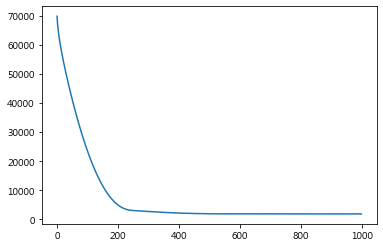

In [9]:
print(hist.history.keys())
plt.plot(hist.history["loss"])

In [10]:
# 몸무게와 나이 입력하여 혈당 예측
model.predict(np.array([100, 40]).reshape(1, 2))
model.predict(np.array([60, 25]).reshape(1, 2))

array([[219.60468]], dtype=float32)

In [11]:
w, b = model.get_weights()  #> 기울기와 절편
print(w, b)

[[1.1939971]
 [5.543506 ]] [9.37719]


### 예제. 주택 가격을 사용한 회귀분석

In [12]:
### 데이터 준비

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [13]:
print(train_data.shape, test_data.shape)
print(train_targets[0:10])

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [14]:
### 전처리(scaling)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
train_data -= mean
train_data /= std

In [15]:
### 모델링

model = Sequential()

model.add(Dense(64, activation="relu", input_shape=(train_data.shape[1], )))
model.add(Dense(64, activation="relu"))  #> 맨 앞의 input_shape 전달받는다
model.add(Dense(1))  #> 텐서플로우 layer 생성 간략화

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])  #> mae=Mean Absolute Error(평균절대오차)

In [16]:
model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1)  #> verbose=1 출력정보 자세히 보여줌

Epoch 1/100
404/404 [==============================] - 0s 946us/step - loss: 104.5788 - mae: 7.0051
Epoch 2/100
404/404 [==============================] - 0s 589us/step - loss: 65.4214 - mae: 5.5568
Epoch 3/100
404/404 [==============================] - 0s 579us/step - loss: 55.7267 - mae: 5.1580
Epoch 4/100
404/404 [==============================] - 0s 582us/step - loss: 45.9518 - mae: 4.6457
Epoch 5/100
404/404 [==============================] - 0s 584us/step - loss: 36.7909 - mae: 4.2067
Epoch 6/100
404/404 [==============================] - 0s 587us/step - loss: 34.1163 - mae: 3.9773
Epoch 7/100
404/404 [==============================] - 0s 582us/step - loss: 32.4086 - mae: 3.9090
Epoch 8/100
404/404 [==============================] - 0s 574us/step - loss: 29.9548 - mae: 3.8310
Epoch 9/100
404/404 [==============================] - 0s 584us/step - loss: 28.7112 - mae: 3.7106
Epoch 10/100
404/404 [==============================] - 0s 579us/step - loss: 27.6961 - mae: 3.6301
Epoch 11

404/404 [==============================] - 0s 599us/step - loss: 16.6267 - mae: 2.7195
Epoch 84/100
404/404 [==============================] - 0s 599us/step - loss: 15.6632 - mae: 2.7552
Epoch 85/100
404/404 [==============================] - 0s 587us/step - loss: 16.0609 - mae: 2.8564
Epoch 86/100
404/404 [==============================] - 0s 594us/step - loss: 16.0780 - mae: 2.7819
Epoch 87/100
404/404 [==============================] - 0s 592us/step - loss: 15.7405 - mae: 2.7559
Epoch 88/100
404/404 [==============================] - 0s 592us/step - loss: 15.8128 - mae: 2.7725
Epoch 89/100
404/404 [==============================] - 0s 611us/step - loss: 14.8769 - mae: 2.6838
Epoch 90/100
404/404 [==============================] - 0s 589us/step - loss: 14.9125 - mae: 2.7666
Epoch 91/100
404/404 [==============================] - 0s 589us/step - loss: 15.9381 - mae: 2.7316
Epoch 92/100
404/404 [==============================] - 0s 589us/step - loss: 15.4934 - mae: 2.6865
Epoch 93/100


In [17]:
### 적합도 검정

mse, mae = model.evaluate(test_data, test_targets, verbose=1)  
    #> evaluate()는 자체 검정용으로 사용하지, 본래 테스트용으로 사용x
print("평균제곱오차: ", mse, ", 평균절대오차: ", mae)

102/102 [==============================] - 0s 324us/step
평균제곱오차:  1645385.9607843137 , 평균절대오차:  1231.9033203125


## 인공신경망

### 예제1

In [18]:
X = np.array([0, 1, 2, 3, 4])
y = X * 2 + 1

In [19]:
### 모델 작성 실습

model = Sequential()

model.add(Dense(1, input_shape=(1, )))

model.compile(loss="mse", optimizer=RMSprop(lr=0.01))
model.fit(X, y, epochs=500, verbose=1)

print("Targets: ", y[2:])
print("Predictions: ", model.predict(X[2:]))

Epoch 1/500
5/5 [==============================] - 0s 16ms/step - loss: 10.3012
Epoch 2/500
5/5 [==============================] - 0s 200us/step - loss: 9.6389
Epoch 3/500
5/5 [==============================] - 0s 400us/step - loss: 9.1796
Epoch 4/500
5/5 [==============================] - 0s 400us/step - loss: 8.8073
Epoch 5/500
5/5 [==============================] - 0s 200us/step - loss: 8.4856
Epoch 6/500
5/5 [==============================] - 0s 200us/step - loss: 8.1980
Epoch 7/500
5/5 [==============================] - 0s 400us/step - loss: 7.9350
Epoch 8/500
5/5 [==============================] - 0s 200us/step - loss: 7.6910
Epoch 9/500
5/5 [==============================] - 0s 0us/step - loss: 7.4620
Epoch 10/500
5/5 [==============================] - 0s 200us/step - loss: 7.2454
Epoch 11/500
5/5 [==============================] - 0s 0us/step - loss: 7.0393
Epoch 12/500
5/5 [==============================] - 0s 200us/step - loss: 6.8421
Epoch 13/500
5/5 [=======================

Epoch 103/500
5/5 [==============================] - 0s 200us/step - loss: 0.0387
Epoch 104/500
5/5 [==============================] - 0s 200us/step - loss: 0.0329
Epoch 105/500
5/5 [==============================] - 0s 200us/step - loss: 0.0278
Epoch 106/500
5/5 [==============================] - 0s 200us/step - loss: 0.0233
Epoch 107/500
5/5 [==============================] - 0s 200us/step - loss: 0.0194
Epoch 108/500
5/5 [==============================] - 0s 200us/step - loss: 0.0160
Epoch 109/500
5/5 [==============================] - 0s 200us/step - loss: 0.0131
Epoch 110/500
5/5 [==============================] - 0s 200us/step - loss: 0.0106
Epoch 111/500
5/5 [==============================] - 0s 0us/step - loss: 0.0085
Epoch 112/500
5/5 [==============================] - 0s 200us/step - loss: 0.0068
Epoch 113/500
5/5 [==============================] - 0s 400us/step - loss: 0.0053
Epoch 114/500
5/5 [==============================] - 0s 0us/step - loss: 0.0042
Epoch 115/500
5/5 [=

Epoch 200/500
5/5 [==============================] - 0s 200us/step - loss: 9.2939e-04
Epoch 201/500
5/5 [==============================] - 0s 200us/step - loss: 8.3506e-04
Epoch 202/500
5/5 [==============================] - 0s 200us/step - loss: 5.1735e-04
Epoch 203/500
5/5 [==============================] - 0s 200us/step - loss: 2.8627e-04
Epoch 204/500
5/5 [==============================] - 0s 0us/step - loss: 1.6638e-04
Epoch 205/500
5/5 [==============================] - 0s 200us/step - loss: 1.0943e-04
Epoch 206/500
5/5 [==============================] - 0s 400us/step - loss: 8.3837e-05
Epoch 207/500
5/5 [==============================] - 0s 200us/step - loss: 7.5334e-05
Epoch 208/500
5/5 [==============================] - 0s 200us/step - loss: 7.9038e-05
Epoch 209/500
5/5 [==============================] - 0s 200us/step - loss: 9.5580e-05
Epoch 210/500
5/5 [==============================] - 0s 0us/step - loss: 1.3031e-04
Epoch 211/500
5/5 [==============================] - 0s 0u

Epoch 296/500
5/5 [==============================] - 0s 200us/step - loss: 2.7762e-04
Epoch 297/500
5/5 [==============================] - 0s 200us/step - loss: 2.7767e-04
Epoch 298/500
5/5 [==============================] - 0s 0us/step - loss: 2.7717e-04
Epoch 299/500
5/5 [==============================] - 0s 200us/step - loss: 2.7630e-04
Epoch 300/500
5/5 [==============================] - 0s 200us/step - loss: 2.7524e-04
Epoch 301/500
5/5 [==============================] - 0s 200us/step - loss: 2.7425e-04
Epoch 302/500
5/5 [==============================] - 0s 200us/step - loss: 2.7352e-04
Epoch 303/500
5/5 [==============================] - 0s 200us/step - loss: 2.7315e-04
Epoch 304/500
5/5 [==============================] - 0s 200us/step - loss: 2.7318e-04
Epoch 305/500
5/5 [==============================] - 0s 0us/step - loss: 2.7357e-04
Epoch 306/500
5/5 [==============================] - 0s 200us/step - loss: 2.7420e-04
Epoch 307/500
5/5 [==============================] - 0s 40

Epoch 392/500
5/5 [==============================] - 0s 0us/step - loss: 2.7503e-04
Epoch 393/500
5/5 [==============================] - 0s 200us/step - loss: 2.7504e-04
Epoch 394/500
5/5 [==============================] - 0s 200us/step - loss: 2.7503e-04
Epoch 395/500
5/5 [==============================] - 0s 0us/step - loss: 2.7501e-04
Epoch 396/500
5/5 [==============================] - 0s 200us/step - loss: 2.7499e-04
Epoch 397/500
5/5 [==============================] - 0s 200us/step - loss: 2.7499e-04
Epoch 398/500
5/5 [==============================] - 0s 200us/step - loss: 2.7498e-04
Epoch 399/500
5/5 [==============================] - 0s 0us/step - loss: 2.7499e-04
Epoch 400/500
5/5 [==============================] - 0s 200us/step - loss: 2.7499e-04
Epoch 401/500
5/5 [==============================] - 0s 200us/step - loss: 2.7499e-04
Epoch 402/500
5/5 [==============================] - 0s 200us/step - loss: 2.7500e-04
Epoch 403/500
5/5 [==============================] - 0s 200u

Epoch 488/500
5/5 [==============================] - 0s 200us/step - loss: 2.7499e-04
Epoch 489/500
5/5 [==============================] - 0s 200us/step - loss: 2.7499e-04
Epoch 490/500
5/5 [==============================] - 0s 400us/step - loss: 2.7499e-04
Epoch 491/500
5/5 [==============================] - 0s 600us/step - loss: 2.7499e-04
Epoch 492/500
5/5 [==============================] - 0s 400us/step - loss: 2.7500e-04
Epoch 493/500
5/5 [==============================] - 0s 400us/step - loss: 2.7501e-04
Epoch 494/500
5/5 [==============================] - 0s 200us/step - loss: 2.7503e-04
Epoch 495/500
5/5 [==============================] - 0s 0us/step - loss: 2.7504e-04
Epoch 496/500
5/5 [==============================] - 0s 200us/step - loss: 2.7503e-04
Epoch 497/500
5/5 [==============================] - 0s 0us/step - loss: 2.7501e-04
Epoch 498/500
5/5 [==============================] - 0s 0us/step - loss: 2.7500e-04
Epoch 499/500
5/5 [==============================] - 0s 200u

In [20]:
### 강사님 풀이

model = Sequential()

model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer="SGD", loss="mse")  #> SGD: 경사하강알고리즘
model.fit(X, y, epochs=500, verbose=1)

print("Targets: ", y[2:])
print("Predictions: ", model.predict(X[2:]))

Epoch 1/500
5/5 [==============================] - 0s 16ms/step - loss: 5.4627
Epoch 2/500
5/5 [==============================] - 0s 400us/step - loss: 4.1362
Epoch 3/500
5/5 [==============================] - 0s 200us/step - loss: 3.1410
Epoch 4/500
5/5 [==============================] - 0s 200us/step - loss: 2.3943
Epoch 5/500
5/5 [==============================] - 0s 200us/step - loss: 1.8339
Epoch 6/500
5/5 [==============================] - 0s 400us/step - loss: 1.4131
Epoch 7/500
5/5 [==============================] - 0s 200us/step - loss: 1.0972
Epoch 8/500
5/5 [==============================] - 0s 200us/step - loss: 0.8598
Epoch 9/500
5/5 [==============================] - 0s 400us/step - loss: 0.6813
Epoch 10/500
5/5 [==============================] - 0s 200us/step - loss: 0.5470
Epoch 11/500
5/5 [==============================] - 0s 200us/step - loss: 0.4459
Epoch 12/500
5/5 [==============================] - 0s 200us/step - loss: 0.3697
Epoch 13/500
5/5 [====================

Epoch 103/500
5/5 [==============================] - 0s 200us/step - loss: 0.0492
Epoch 104/500
5/5 [==============================] - 0s 400us/step - loss: 0.0486
Epoch 105/500
5/5 [==============================] - 0s 200us/step - loss: 0.0481
Epoch 106/500
5/5 [==============================] - 0s 600us/step - loss: 0.0475
Epoch 107/500
5/5 [==============================] - 0s 200us/step - loss: 0.0469
Epoch 108/500
5/5 [==============================] - 0s 0us/step - loss: 0.0464
Epoch 109/500
5/5 [==============================] - 0s 200us/step - loss: 0.0458
Epoch 110/500
5/5 [==============================] - 0s 200us/step - loss: 0.0453
Epoch 111/500
5/5 [==============================] - 0s 200us/step - loss: 0.0447
Epoch 112/500
5/5 [==============================] - 0s 0us/step - loss: 0.0442
Epoch 113/500
5/5 [==============================] - 0s 200us/step - loss: 0.0437
Epoch 114/500
5/5 [==============================] - 0s 200us/step - loss: 0.0431
Epoch 115/500
5/5 [=

Epoch 204/500
5/5 [==============================] - 0s 200us/step - loss: 0.0147
Epoch 205/500
5/5 [==============================] - 0s 200us/step - loss: 0.0145
Epoch 206/500
5/5 [==============================] - 0s 400us/step - loss: 0.0143
Epoch 207/500
5/5 [==============================] - 0s 200us/step - loss: 0.0142
Epoch 208/500
5/5 [==============================] - 0s 200us/step - loss: 0.0140
Epoch 209/500
5/5 [==============================] - 0s 0us/step - loss: 0.0138
Epoch 210/500
5/5 [==============================] - 0s 200us/step - loss: 0.0137
Epoch 211/500
5/5 [==============================] - 0s 200us/step - loss: 0.0135
Epoch 212/500
5/5 [==============================] - 0s 400us/step - loss: 0.0133
Epoch 213/500
5/5 [==============================] - 0s 200us/step - loss: 0.0132
Epoch 214/500
5/5 [==============================] - 0s 0us/step - loss: 0.0130
Epoch 215/500
5/5 [==============================] - 0s 200us/step - loss: 0.0129
Epoch 216/500
5/5 [=

Epoch 305/500
5/5 [==============================] - 0s 400us/step - loss: 0.0044
Epoch 306/500
5/5 [==============================] - 0s 200us/step - loss: 0.0043
Epoch 307/500
5/5 [==============================] - 0s 200us/step - loss: 0.0043
Epoch 308/500
5/5 [==============================] - 0s 200us/step - loss: 0.0042
Epoch 309/500
5/5 [==============================] - 0s 200us/step - loss: 0.0042
Epoch 310/500
5/5 [==============================] - 0s 200us/step - loss: 0.0041
Epoch 311/500
5/5 [==============================] - 0s 0us/step - loss: 0.0041
Epoch 312/500
5/5 [==============================] - 0s 200us/step - loss: 0.0040
Epoch 313/500
5/5 [==============================] - 0s 200us/step - loss: 0.0040
Epoch 314/500
5/5 [==============================] - 0s 0us/step - loss: 0.0039
Epoch 315/500
5/5 [==============================] - 0s 200us/step - loss: 0.0039
Epoch 316/500
5/5 [==============================] - 0s 200us/step - loss: 0.0038
Epoch 317/500
5/5 [=

Epoch 406/500
5/5 [==============================] - 0s 200us/step - loss: 0.0013
Epoch 407/500
5/5 [==============================] - 0s 0us/step - loss: 0.0013
Epoch 408/500
5/5 [==============================] - 0s 200us/step - loss: 0.0013
Epoch 409/500
5/5 [==============================] - 0s 200us/step - loss: 0.0013
Epoch 410/500
5/5 [==============================] - 0s 200us/step - loss: 0.0012
Epoch 411/500
5/5 [==============================] - 0s 200us/step - loss: 0.0012
Epoch 412/500
5/5 [==============================] - 0s 200us/step - loss: 0.0012
Epoch 413/500
5/5 [==============================] - 0s 0us/step - loss: 0.0012
Epoch 414/500
5/5 [==============================] - 0s 200us/step - loss: 0.0012
Epoch 415/500
5/5 [==============================] - 0s 0us/step - loss: 0.0012
Epoch 416/500
5/5 [==============================] - 0s 200us/step - loss: 0.0012
Epoch 417/500
5/5 [==============================] - 0s 200us/step - loss: 0.0011
Epoch 418/500
5/5 [===

### 예제2. MNIST

In [21]:
from keras.datasets import mnist

(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

In [22]:
print(train_data.shape, test_data.shape)
print(train_targets[0:10])

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


In [23]:
### 전처리(스케일 조정)

train_data = train_data.reshape(60000, 784).astype("float32") / 255.0
test_data = test_data.reshape(10000, 784).astype("float32") / 255.0

In [24]:
### one-hot encoding

from keras.utils import np_utils

train_targets = np_utils.to_categorical(train_targets) 
test_targets = np_utils.to_categorical(test_targets) 

In [25]:
### validation 분할

x_val = train_data[:12600]
X_train = train_data[12600:]
y_val = train_targets[:12600]
y_train = train_targets[12600:]

In [26]:
### 모델 작성

model = Sequential()

model.add(Dense(units=64, input_dim=28*28, activation="relu"))  
    #> 이미지이기 때문에 input_shape 대신 input_dim 사용(실제 입력되는 데이터 하나의 크기)
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))
    #> 테스트 전 훈련용 데이터로 자체 확인

Train on 47400 samples, validate on 12600 samples
Epoch 1/5
47400/47400 [==============================] - 2s 43us/step - loss: 0.7429 - accuracy: 0.8132 - val_loss: 0.4097 - val_accuracy: 0.8906
Epoch 2/5
47400/47400 [==============================] - 2s 41us/step - loss: 0.3711 - accuracy: 0.8971 - val_loss: 0.3291 - val_accuracy: 0.9078
Epoch 3/5
47400/47400 [==============================] - 2s 41us/step - loss: 0.3159 - accuracy: 0.9106 - val_loss: 0.2989 - val_accuracy: 0.9159
Epoch 4/5
47400/47400 [==============================] - 2s 39us/step - loss: 0.2849 - accuracy: 0.9203 - val_loss: 0.2729 - val_accuracy: 0.9233
Epoch 5/5
47400/47400 [==============================] - 2s 40us/step - loss: 0.2623 - accuracy: 0.9267 - val_loss: 0.2554 - val_accuracy: 0.9269


In [29]:
### 적합도 평가

result = model.evaluate(test_data, test_targets, batch_size=32)
print("loss and metrics: ", result)

10000/10000 [==============================] - 0s 18us/step
loss and metrics:  [0.24231007460355758, 0.9304999709129333]


In [30]:
### 실제 예측

xhat_idx = np.random.choice(test_data.shape[0], 10)
xhat = test_data[xhat_idx]
yhat = model.predict_classes(xhat)
yhat

array([7, 9, 0, 0, 2, 3, 5, 4, 0, 5], dtype=int64)

In [31]:
### 예측 확인

for i in range(10):
    print("True: ", np.argmax(test_targets[xhat_idx[i]]), ", predict: ", yhat[i])

True:  7 , predict:  7
True:  9 , predict:  9
True:  0 , predict:  0
True:  0 , predict:  0
True:  2 , predict:  2
True:  9 , predict:  3
True:  5 , predict:  5
True:  4 , predict:  4
True:  0 , predict:  0
True:  5 , predict:  5


In [32]:
### 모든 학습 내역 저장

model.save("data/mnist_model.h5")  #> h5 확장자로 저장(Keras 자체 형식)

In [33]:
### 저장 파일 로드

model = load_model("data/mnist_model.h5")

In [34]:
### 테스트 위한 데이터 선별

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, 784).astype("float32")/255.0
y_test = np_utils.to_categorical(y_test)

xhat_idx = np.random.choice(X_test.shape[0], 10)
xhat = X_test[xhat_idx]

In [35]:
yhat = model.predict_classes(xhat)

for i in range(10):
    print("True: ", np.argmax(y_test[xhat_idx[i]]), ", Predict: ", yhat[i])

True:  5 , Predict:  2
True:  9 , Predict:  9
True:  0 , Predict:  0
True:  3 , Predict:  3
True:  4 , Predict:  4
True:  0 , Predict:  0
True:  0 , Predict:  0
True:  0 , Predict:  0
True:  6 , Predict:  6
True:  4 , Predict:  4


In [36]:
### 그래프 그리기
from keras.datasets import mnist
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

### 전처리(스케일 조정)
train_data = train_data.reshape(60000, 784).astype("float32") / 255.0
test_data = test_data.reshape(10000, 784).astype("float32") / 255.0

### one-hot encoding
train_targets = np_utils.to_categorical(train_targets) 
test_targets = np_utils.to_categorical(test_targets) 

### validation 분할
x_val = train_data[:12600]
X_train = train_data[12600:]
y_val = train_targets[:12600]
y_train = train_targets[12600:]

### 모델 작성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation="relu"))  
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# 텐서보드: cmd > tensorboard --logdir=
tf_hist = keras.callbacks.TensorBoard(log_dir="./graph", histogram_freq=0, write_graph=True, write_images=True)
        #> callbacks 필요에 따라 시스템이 호출해서 사용하도록 하는 함수
#

hist = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val), 
                callbacks=[tf_hist])

### 적합도 검정
#result = model.evaluate(test_data, test_targets, batch_size=32)

Train on 47400 samples, validate on 12600 samples


Epoch 1/5
47400/47400 [==============================] - 2s 43us/step - loss: 0.7379 - accuracy: 0.8163 - val_loss: 0.4120 - val_accuracy: 0.8874

Epoch 2/5
47400/47400 [==============================] - 2s 43us/step - loss: 0.3727 - accuracy: 0.8961 - val_loss: 0.3350 - val_accuracy: 0.9067
Epoch 3/5
47400/47400 [==============================] - 2s 41us/step - loss: 0.3205 - accuracy: 0.9092 - val_loss: 0.3014 - val_accuracy: 0.9151
Epoch 4/5
47400/47400 [==============================] - 2s 41us/step - loss: 0.2911 - accuracy: 0.9174 - val_loss: 0.2780 - val_accuracy: 0.9219
Epoch 5/5
47400/47400 [==============================] - 2s 41us/step - loss: 0.2702 - accuracy: 0.9229 - val_loss: 0.2635 - val_accuracy: 0.9252


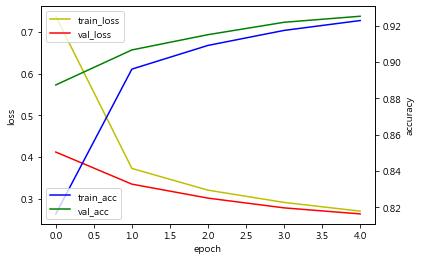

In [37]:
## 기본 정보 확인
# print("훈련 손실율: ", hist.history["loss"])
# print(hist.history["val_loss"])
# print(hist.history["accuracy"])
# print(hist.history["val_accuracy"])

### 시각화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")  #> 손실율 높아지는 시점 = 과적합 시점
acc_ax.set_ylabel("accuracy")  #> 정확도 낮아지는 시점 = 과적합 시점
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

### EarlyStopping(): 조기 종료. 스스로 모니터링 중 더이상 학습 효과 없다고 판단될 경우 자동으로 종료

    - monitor= 관찰하고자 하는 항목. "val_loss", "val_acc" 주로 사용
    
    - min_delta= 개선되고 있다고 판단하기 위한 최소 변화량
    
    - patience= 지정된 값까지 기다렸다가 종료(학습 효과 떨어진다고 바로 종료x. epoch 횟수 지정)

In [38]:
### 그래프 그리기
from keras.datasets import mnist
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

### 전처리(스케일 조정)
train_data = train_data.reshape(60000, 784).astype("float32") / 255.0
test_data = test_data.reshape(10000, 784).astype("float32") / 255.0

### one-hot encoding
train_targets = np_utils.to_categorical(train_targets) 
test_targets = np_utils.to_categorical(test_targets) 

### validation 분할
x_val = train_data[:12600]
X_train = train_data[12600:]
y_val = train_targets[:12600]
y_train = train_targets[12600:]

### 모델 작성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation="relu"))  
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# 텐서보드: cmd > tensorboard --logdir=graph
tf_hist = keras.callbacks.TensorBoard(log_dir="./graph", histogram_freq=0, write_graph=True, write_images=True)
        #> callbacks 필요에 따라 시스템이 호출해서 사용하도록 하는 함수
#

# 조기종료
from keras.callbacks import EarlyStopping
early = EarlyStopping()
#

hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), 
                callbacks=[tf_hist, early])

Train on 47400 samples, validate on 12600 samples
Epoch 1/50
47400/47400 [==============================] - 2s 44us/step - loss: 0.7634 - accuracy: 0.8039 - val_loss: 0.4056 - val_accuracy: 0.8894
Epoch 2/50
47400/47400 [==============================] - 2s 42us/step - loss: 0.3715 - accuracy: 0.8958 - val_loss: 0.3286 - val_accuracy: 0.9091
Epoch 3/50
47400/47400 [==============================] - 2s 42us/step - loss: 0.3184 - accuracy: 0.9102 - val_loss: 0.2995 - val_accuracy: 0.9156
Epoch 4/50
47400/47400 [==============================] - 2s 41us/step - loss: 0.2890 - accuracy: 0.9184 - val_loss: 0.2765 - val_accuracy: 0.9229
Epoch 5/50
47400/47400 [==============================] - 2s 41us/step - loss: 0.2672 - accuracy: 0.9247 - val_loss: 0.2581 - val_accuracy: 0.9272
Epoch 6/50
47400/47400 [==============================] - 2s 53us/step - loss: 0.2502 - accuracy: 0.9292 - val_loss: 0.2447 - val_accuracy: 0.9310
Epoch 7/50
47400/47400 [==============================] - 4s 81us/st

### 예제3. 당뇨병 데이터셋

- 피마족 인디언 당뇨병 발병 데이터셋 (768개, 속성수:8개, 클래스:2가지)

    1. 임신 횟수
    2. 경구 포도당 내성검사에서 2시간 동안의 혈장 포도당 농도
    3. 이완기 혈압(mm Hg)
    4. 삼두근 피부 두겹 두께(mm)
    5. 2시간 혈청 인슐린(mu U/ml)
    6. 체질량 지수
    7. 당뇨 직계 가족력
    8. 나이
    9. 5년 이내 당뇨병의 발병 여부(이진 분류)
    
- 양성 : 268개(34.9%), 음성 : 500개(65.1%)

In [39]:
### 데이터셋 준비
np.random.seed(5)
data = np.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")

### 훈련용/테스트용 분리(75:25)
X_train = data[:576, 0:8]
y_train = data[:576, 8]
X_test = data[576:, 0:8]
y_test = data[576:, 8]

### 모델 구성
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))  #> 이진분류이므로 sigmoid 사용(다항분류일 경우 softmax)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(X_train, y_train, epochs=1500, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1500
576/576 [==============================] - 0s 411us/step - loss: 10.8895 - accuracy: 0.6562
Epoch 2/1500
576/576 [==============================] - 0s 17us/step - loss: 9.0160 - accuracy: 0.6458
Epoch 3/1500
576/576 [==============================] - 0s 24us/step - loss: 7.5570 - accuracy: 0.6146
Epoch 4/1500
576/576 [==============================] - 0s 19us/step - loss: 6.2986 - accuracy: 0.6111
Epoch 5/1500
576/576 [==============================] - 0s 75us/step - loss: 5.0467 - accuracy: 0.6302
Epoch 6/1500
576/576 [==============================] - 0s 17us/step - loss: 3.9306 - accuracy: 0.6510
Epoch 7/1500
576/576 [==============================] - 0s 19us/step - loss: 3.0454 - accuracy: 0.6458
Epoch 8/1500
576/576 [==============================] - 0s 19us/step - loss: 2.4270 - accuracy: 0.6024
Epoch 9/1500
576/576 [==============================] - 0s 17us/step - loss: 2.0

576/576 [==============================] - 0s 16us/step - loss: 0.5769 - accuracy: 0.7118
Epoch 77/1500
576/576 [==============================] - 0s 19us/step - loss: 0.5792 - accuracy: 0.7031
Epoch 78/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5807 - accuracy: 0.6910
Epoch 79/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5728 - accuracy: 0.7188
Epoch 80/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5728 - accuracy: 0.7118
Epoch 81/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5713 - accuracy: 0.7170
Epoch 82/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5746 - accuracy: 0.6997
Epoch 83/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5730 - accuracy: 0.7101
Epoch 84/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5678 - accuracy: 0.7222
Epoch 85/1500
576/576 [==============================] - 0s 16us/step - loss: 

576/576 [==============================] - 0s 16us/step - loss: 0.5355 - accuracy: 0.7361
Epoch 155/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5303 - accuracy: 0.7396
Epoch 156/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5323 - accuracy: 0.7361
Epoch 157/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5347 - accuracy: 0.7326
Epoch 158/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5304 - accuracy: 0.7361
Epoch 159/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5297 - accuracy: 0.7396
Epoch 160/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5311 - accuracy: 0.7396
Epoch 161/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5349 - accuracy: 0.7292
Epoch 162/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5380 - accuracy: 0.7326
Epoch 163/1500
576/576 [==============================] - 0s 14us/step

576/576 [==============================] - 0s 16us/step - loss: 0.5165 - accuracy: 0.7500
Epoch 233/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5275 - accuracy: 0.7344
Epoch 234/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5234 - accuracy: 0.7396
Epoch 235/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5153 - accuracy: 0.7361
Epoch 236/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5129 - accuracy: 0.7535
Epoch 237/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5131 - accuracy: 0.7413
Epoch 238/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5112 - accuracy: 0.7361
Epoch 239/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5095 - accuracy: 0.7500
Epoch 240/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5097 - accuracy: 0.7483
Epoch 241/1500
576/576 [==============================] - 0s 14us/step

576/576 [==============================] - 0s 17us/step - loss: 0.4963 - accuracy: 0.7552
Epoch 311/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4956 - accuracy: 0.7517
Epoch 312/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5022 - accuracy: 0.7500
Epoch 313/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4920 - accuracy: 0.7535
Epoch 314/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4972 - accuracy: 0.7535
Epoch 315/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4976 - accuracy: 0.7691
Epoch 316/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4911 - accuracy: 0.7535
Epoch 317/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4915 - accuracy: 0.7639
Epoch 318/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4950 - accuracy: 0.7448
Epoch 319/1500
576/576 [==============================] - 0s 21us/step

576/576 [==============================] - 0s 17us/step - loss: 0.4891 - accuracy: 0.7569
Epoch 389/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4872 - accuracy: 0.7500
Epoch 390/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4832 - accuracy: 0.7674
Epoch 391/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4817 - accuracy: 0.7535
Epoch 392/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4878 - accuracy: 0.7587
Epoch 393/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4883 - accuracy: 0.7587
Epoch 394/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4858 - accuracy: 0.7726
Epoch 395/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4903 - accuracy: 0.7622
Epoch 396/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4858 - accuracy: 0.7674
Epoch 397/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 14us/step - loss: 0.4712 - accuracy: 0.7778
Epoch 467/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4709 - accuracy: 0.7691
Epoch 468/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4719 - accuracy: 0.7708
Epoch 469/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4741 - accuracy: 0.7743
Epoch 470/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4758 - accuracy: 0.7674
Epoch 471/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4779 - accuracy: 0.7743
Epoch 472/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4741 - accuracy: 0.7622
Epoch 473/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4789 - accuracy: 0.7691
Epoch 474/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4775 - accuracy: 0.7674
Epoch 475/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4692 - accuracy: 0.7604
Epoch 545/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4633 - accuracy: 0.7830
Epoch 546/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4660 - accuracy: 0.7726
Epoch 547/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4642 - accuracy: 0.7760
Epoch 548/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4660 - accuracy: 0.7760
Epoch 549/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4639 - accuracy: 0.7830
Epoch 550/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4617 - accuracy: 0.7812
Epoch 551/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4625 - accuracy: 0.7743
Epoch 552/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4667 - accuracy: 0.7656
Epoch 553/1500
576/576 [==============================] - 0s 14us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4558 - accuracy: 0.7917
Epoch 623/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4596 - accuracy: 0.7812
Epoch 624/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4569 - accuracy: 0.7812
Epoch 625/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4629 - accuracy: 0.7726
Epoch 626/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4684 - accuracy: 0.7691
Epoch 627/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4662 - accuracy: 0.7812
Epoch 628/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4672 - accuracy: 0.7760
Epoch 629/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4642 - accuracy: 0.7778
Epoch 630/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4612 - accuracy: 0.7743
Epoch 631/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4456 - accuracy: 0.7812
Epoch 701/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4451 - accuracy: 0.7917
Epoch 702/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4432 - accuracy: 0.7882
Epoch 703/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4437 - accuracy: 0.7865
Epoch 704/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4432 - accuracy: 0.7917
Epoch 705/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4450 - accuracy: 0.7795
Epoch 706/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4448 - accuracy: 0.7847
Epoch 707/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4472 - accuracy: 0.7899
Epoch 708/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4454 - accuracy: 0.7882
Epoch 709/1500
576/576 [==============================] - 0s 17us/step

576/576 [==============================] - 0s 14us/step - loss: 0.4391 - accuracy: 0.7934
Epoch 779/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4378 - accuracy: 0.7917
Epoch 780/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4362 - accuracy: 0.7969
Epoch 781/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4355 - accuracy: 0.7951
Epoch 782/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4406 - accuracy: 0.7847
Epoch 783/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4369 - accuracy: 0.7882
Epoch 784/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4357 - accuracy: 0.7934
Epoch 785/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4362 - accuracy: 0.7951
Epoch 786/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4372 - accuracy: 0.7934
Epoch 787/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4322 - accuracy: 0.7969
Epoch 857/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4297 - accuracy: 0.7899
Epoch 858/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4307 - accuracy: 0.7969
Epoch 859/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4290 - accuracy: 0.7986
Epoch 860/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4310 - accuracy: 0.7917
Epoch 861/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4304 - accuracy: 0.7917
Epoch 862/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4274 - accuracy: 0.7882
Epoch 863/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4312 - accuracy: 0.7917
Epoch 864/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4401 - accuracy: 0.7812
Epoch 865/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4262 - accuracy: 0.7934
Epoch 935/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4223 - accuracy: 0.7917
Epoch 936/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4227 - accuracy: 0.7969
Epoch 937/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4216 - accuracy: 0.8021
Epoch 938/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4253 - accuracy: 0.7969
Epoch 939/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4249 - accuracy: 0.7917
Epoch 940/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4323 - accuracy: 0.7934
Epoch 941/1500
576/576 [==============================] - 0s 21us/step - loss: 0.4258 - accuracy: 0.8003
Epoch 942/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4281 - accuracy: 0.7882
Epoch 943/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4190 - accuracy: 0.8003
Epoch 1013/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4187 - accuracy: 0.7882
Epoch 1014/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4143 - accuracy: 0.8108
Epoch 1015/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4159 - accuracy: 0.8056
Epoch 1016/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4146 - accuracy: 0.8003
Epoch 1017/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4149 - accuracy: 0.7951
Epoch 1018/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4143 - accuracy: 0.8056
Epoch 1019/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4164 - accuracy: 0.7934
Epoch 1020/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4242 - accuracy: 0.7812
Epoch 1021/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4103 - accuracy: 0.8038
Epoch 1090/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4116 - accuracy: 0.7986
Epoch 1091/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4099 - accuracy: 0.7951
Epoch 1092/1500
576/576 [==============================] - 0s 99us/step - loss: 0.4107 - accuracy: 0.8038
Epoch 1093/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4077 - accuracy: 0.8056
Epoch 1094/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4131 - accuracy: 0.7986
Epoch 1095/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4123 - accuracy: 0.7951
Epoch 1096/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4126 - accuracy: 0.8056
Epoch 1097/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4145 - accuracy: 0.7899
Epoch 1098/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4205 - accuracy: 0.7812
Epoch 1167/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4265 - accuracy: 0.7830
Epoch 1168/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4140 - accuracy: 0.7847
Epoch 1169/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4135 - accuracy: 0.7917
Epoch 1170/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4133 - accuracy: 0.7917
Epoch 1171/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4063 - accuracy: 0.7951
Epoch 1172/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4080 - accuracy: 0.8038
Epoch 1173/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4121 - accuracy: 0.7812
Epoch 1174/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4069 - accuracy: 0.7969
Epoch 1175/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4087 - accuracy: 0.7847
Epoch 1244/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4083 - accuracy: 0.8003
Epoch 1245/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4045 - accuracy: 0.7969
Epoch 1246/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4103 - accuracy: 0.7847
Epoch 1247/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4042 - accuracy: 0.8038
Epoch 1248/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4047 - accuracy: 0.7951
Epoch 1249/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4032 - accuracy: 0.7969
Epoch 1250/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4039 - accuracy: 0.7934
Epoch 1251/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4043 - accuracy: 0.8038
Epoch 1252/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4004 - accuracy: 0.7951
Epoch 1321/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4008 - accuracy: 0.7969
Epoch 1322/1500
576/576 [==============================] - 0s 26us/step - loss: 0.4050 - accuracy: 0.8056
Epoch 1323/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4039 - accuracy: 0.7899
Epoch 1324/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3974 - accuracy: 0.8038
Epoch 1325/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4009 - accuracy: 0.7951
Epoch 1326/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4017 - accuracy: 0.7899
Epoch 1327/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3987 - accuracy: 0.8003
Epoch 1328/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4028 - accuracy: 0.7934
Epoch 1329/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4084 - accuracy: 0.8038
Epoch 1398/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4036 - accuracy: 0.7986
Epoch 1399/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4060 - accuracy: 0.7917
Epoch 1400/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4077 - accuracy: 0.7899
Epoch 1401/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3999 - accuracy: 0.7986
Epoch 1402/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3990 - accuracy: 0.7865
Epoch 1403/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3978 - accuracy: 0.8021
Epoch 1404/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3969 - accuracy: 0.8090
Epoch 1405/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3985 - accuracy: 0.7986
Epoch 1406/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.3995 - accuracy: 0.8003
Epoch 1475/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3991 - accuracy: 0.7951
Epoch 1476/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3939 - accuracy: 0.8021
Epoch 1477/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3990 - accuracy: 0.8021
Epoch 1478/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3947 - accuracy: 0.8003
Epoch 1479/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4024 - accuracy: 0.7951
Epoch 1480/1500
576/576 [==============================] - 0s 14us/step - loss: 0.3908 - accuracy: 0.8003
Epoch 1481/1500
576/576 [==============================] - 0s 16us/step - loss: 0.3997 - accuracy: 0.7899
Epoch 1482/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4090 - accuracy: 0.7934
Epoch 1483/1500
576/576 [==============================] - 0s 

In [40]:
### 모델 평가
scores = model.evaluate(X_test, y_test)
print("손실율: ", scores)

192/192 [==============================] - 0s 281us/step
손실율:  [0.5556592990954717, 0.75]


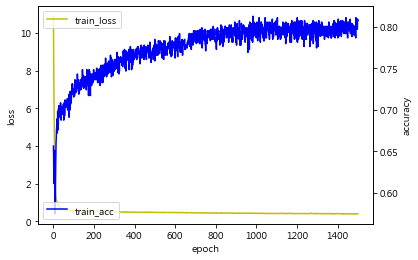

In [41]:
### 시각화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history["loss"], "y", label="train_loss")
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")  #> 손실율 높아지는 시점 = 과적합 시점
acc_ax.set_ylabel("accuracy")  #> 정확도 낮아지는 시점 = 과적합 시점
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

### 예제4. 붓꽃 데이터

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

iris = sns.load_dataset("iris")

### one-hot encoding
X = iris.iloc[:, :4].values
y = iris.iloc[:, -1].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y2 = pd.get_dummies(y1).values
y2[:10]

### 훈련용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1)

### 모델 생성
model = Sequential()
model.add(Dense(64, input_shape=(4, ), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
    #> validation_data= 자체 검정 위함(정상적인 사용방법x)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 1.6132 - accuracy: 0.3250 - val_loss: 1.1342 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 92us/step - loss: 1.0581 - accuracy: 0.3750 - val_loss: 1.0434 - val_accuracy: 0.2000
Epoch 3/100
120/120 [==============================] - 0s 92us/step - loss: 0.9379 - accuracy: 0.3667 - val_loss: 1.0706 - val_accuracy: 0.2000
Epoch 4/100
120/120 [==============================] - 0s 92us/step - loss: 0.9313 - accuracy: 0.3667 - val_loss: 1.0413 - val_accuracy: 0.2000
Epoch 5/100
120/120 [==============================] - 0s 92us/step - loss: 0.8846 - accuracy: 0.3750 - val_loss: 0.9358 - val_accuracy: 0.2333
Epoch 6/100
120/120 [==============================] - 0s 92us/step - loss: 0.8085 - accuracy: 0.3917 - val_loss: 0.8498 - val_accuracy: 0.5333
Epoch 7/100
120/120 [==============================] - 0s 92us/step - loss: 0.7429 - accurac

120/120 [==============================] - 0s 75us/step - loss: 0.1231 - accuracy: 0.9750 - val_loss: 0.1544 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 125us/step - loss: 0.1194 - accuracy: 0.9750 - val_loss: 0.1582 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 83us/step - loss: 0.1179 - accuracy: 0.9750 - val_loss: 0.1489 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 75us/step - loss: 0.1162 - accuracy: 0.9750 - val_loss: 0.1443 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 75us/step - loss: 0.1137 - accuracy: 0.9750 - val_loss: 0.1420 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 83us/step - loss: 0.1121 - accuracy: 0.9750 - val_loss: 0.1480 - val_accuracy: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 75us/step - loss: 0.1091 - accuracy: 0.9750 - val_loss: 0.1352 - val_accuracy: 1.00

----------------1
30/30 [==============================] - 0s 67us/step
정확도:  1.0
----------------2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
----------------3
품종 예측:  ['setosa']
품종 예측:  ['virginica']


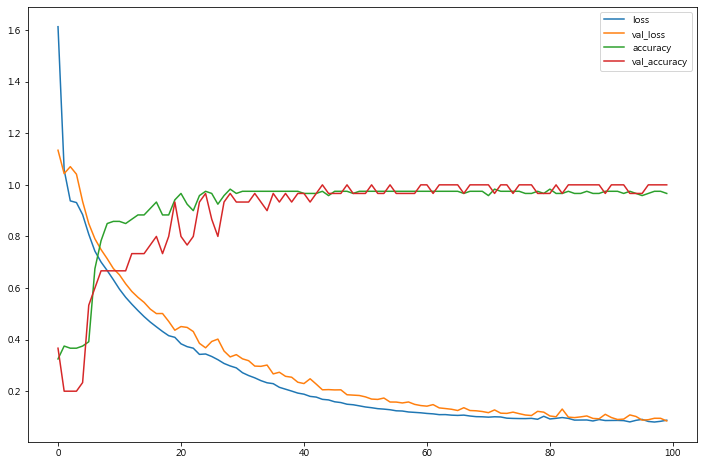

In [43]:
### 시각화
plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

plt.legend(["loss", "val_loss", "accuracy", "val_accuracy"])

### 모델 평가
print("----------------1")
loss, accuracy = model.evaluate(X_test, y_test)  #> 원래는 훈련 데이터셋을 나눠서 해야한다(test 데이터를 넣었으므로 정확도 1.0)
print("정확도: ", accuracy)

### 예측 테스트
print("----------------2")
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test_class, y_pred_class))
print("confusion matrix: \n", confusion_matrix(y_test_class, y_pred_class))

### 새로운 값으로 테스트
print("----------------3")
test_set = np.array([[5, 2.9, 1, 0.2]])
print("품종 예측: ", iris["species"].unique()[model.predict_classes(test_set)])

test_set = np.array([[7, 3.0, 5, 2.4]])
print("품종 예측: ", iris["species"].unique()[model.predict_classes(test_set)])

## DNN

In [44]:
### 데이터 준비 및 전처리(MNIST)

## 데이터 준비(MNIST)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## 차원 정리(3차원 -> 2차원)
X_train.shape  #> 3차원
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, W*H)

## 표준화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [45]:
### 모델 생성 위한 함수 준비
def make_model(input_number, hidden_layers, output_number):
    model = keras.models.Sequential()  #> import 여부 따라 keras.models 붙임
    
    # 첫번째 은닉층
    model.add(Dense(hidden_layers[0], activation="relu", input_shape=(input_number, ), name="Hidden-1"))
        #> input_shape 2차원으로 넘김
    
    # 두번째 은닉층
    model.add(Dense(hidden_layers[1], activation="relu", name="Hidden-2"))
    model.add(keras.layers.Dropout(0.2))  #> 80%의 데이터로만 훈련
    
    # 출력층
    model.add(Dense(output_number, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [46]:
### 파라미터 준비
input_number = 28*28
hidden_layers = [100, 50]
number_of_class = 10
output_number = number_of_class

### 모델 생성
model = make_model(input_number, hidden_layers, output_number)

In [47]:
### 학습
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.4491 - accuracy: 0.8669 - val_loss: 0.1848 - val_accuracy: 0.9455
Epoch 2/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1910 - accuracy: 0.9440 - val_loss: 0.1356 - val_accuracy: 0.9585
Epoch 3/5
48000/48000 [==============================] - 2s 35us/step - loss: 0.1397 - accuracy: 0.9597 - val_loss: 0.1152 - val_accuracy: 0.9657
Epoch 4/5
48000/48000 [==============================] - 2s 35us/step - loss: 0.1111 - accuracy: 0.9676 - val_loss: 0.1021 - val_accuracy: 0.9696
Epoch 5/5
48000/48000 [==============================] - 2s 35us/step - loss: 0.0912 - accuracy: 0.9721 - val_loss: 0.0973 - val_accuracy: 0.9700


In [48]:
### 모델 평가
perform = model.evaluate(X_test, y_test, batch_size=100)
print("손실율, 정확도: ", perform)

10000/10000 [==============================] - 0s 11us/step
손실율, 정확도:  [0.09276506903697737, 0.9714000225067139]


In [49]:
### 과제. hidden layer 하나 더 추가(노드 수: 30개)

def make_model(input_number, hidden_layers, output_number):
    model = keras.models.Sequential()  #> import 여부 따라 keras.models 붙임
    
    # 첫번째 은닉층
    model.add(Dense(hidden_layers[0], activation="relu", input_shape=(input_number, ), name="Hidden-1"))
        #> input_shape 2차원으로 넘김
    
    # 두번째 은닉층
    model.add(Dense(hidden_layers[1], activation="relu", name="Hidden-2"))
        
    # 과제. 은닉층 추가
    model.add(Dense(hidden_layers[2], activation="relu", name="Hidden-3"))
    model.add(keras.layers.Dropout(0.2))  #> 80%의 데이터로만 훈련
    
    # 출력층
    model.add(Dense(output_number, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [50]:
### 파라미터 준비
input_number = 28*28
hidden_layers = [100, 50, 30]
number_of_class = 10
output_number = number_of_class

### 모델 생성
model = make_model(input_number, hidden_layers, output_number)

### 학습
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 47us/step - loss: 0.5149 - accuracy: 0.8471 - val_loss: 0.1838 - val_accuracy: 0.9483
Epoch 2/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.2046 - accuracy: 0.9416 - val_loss: 0.1371 - val_accuracy: 0.9603
Epoch 3/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.1455 - accuracy: 0.9592 - val_loss: 0.1199 - val_accuracy: 0.9657
Epoch 4/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.1172 - accuracy: 0.9669 - val_loss: 0.1164 - val_accuracy: 0.9672
Epoch 5/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.0968 - accuracy: 0.9722 - val_loss: 0.1106 - val_accuracy: 0.9686


In [51]:
### 모델 평가
perform = model.evaluate(X_test, y_test, batch_size=100)
print("손실율, 정확도: ", perform)

10000/10000 [==============================] - 0s 12us/step
손실율, 정확도:  [0.09869732277322328, 0.9704999923706055]


## CNN

In [52]:
### 모델 구축
model = Sequential()

### convoultion layer 생성: 필터 수 32개, 필터 크기 3*3, 입력 데이터 28*28*1
from keras import layers

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))

### FC layer
model.add(layers.Flatten())  #> 차원 평탄화
model.add(Dense(64, activation="relu"))  #> input 따로 지정x (위에서 계속 연결)
model.add(Dense(10, activation="softmax"))

model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)             

In [53]:
### 데이터 준비(MNIST)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### 차원 정리
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### 표준화
X_train = X_train / 255.0
X_test = X_test / 255.0

### compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 39s 645us/step - loss: 0.1824 - accuracy: 0.9445
Epoch 2/5
60000/60000 [==============================] - 38s 639us/step - loss: 0.0494 - accuracy: 0.9843
Epoch 3/5
60000/60000 [==============================] - 39s 652us/step - loss: 0.0363 - accuracy: 0.9890
Epoch 4/5
60000/60000 [==============================] - 39s 650us/step - loss: 0.0292 - accuracy: 0.9907
Epoch 5/5
60000/60000 [==============================] - 39s 650us/step - loss: 0.0239 - accuracy: 0.9926


# Auto Encoder

In [54]:
import tensorflow as tf

### 데이터 수집 및 전처리

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784)

X_test = X_test[:300]
y_test = y_test[:300]
X_test = X_test.reshape(300, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

gray_scale = 255
X_train /= gray_scale
X_test /= gray_scale

In [55]:
### 텐서플로우 모델

_input = tf.placeholder(tf.float32, shape=[None, 28*28])

encoder = tf.layers.dense(_input, 128, tf.nn.tanh)

bottleneck = tf.layers.dense(encoder, 3)

decoder = tf.layers.dense(bottleneck, 128, tf.nn.tanh)

_output = tf.layers.dense(decoder, 28*28, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=_input, predictions=_output)
train = tf.train.AdamOptimizer(0.002).minimize(loss)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [56]:
# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 50
batch_size = 5000
iteration = len(X_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    print("train start...")
    for epoch in range(epoch_cnt):
        avg_loss = 0.0
        start = 0; end = batch_size
        for i in range(iteration):
            , loss = sess.run([train, loss], feed_dict={_input: X_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss / iteration

        print("epoch : "+str(epoch)+ " , train loss : "+str(avg_loss))
    # take compressed vector
    _bottleneck = sess.run(bottleneck, {_input: X_test})

train start...
epoch : 0 , train loss : Tensor("add_11:0", shape=(), dtype=float32)
epoch : 1 , train loss : Tensor("add_23:0", shape=(), dtype=float32)
epoch : 2 , train loss : Tensor("add_35:0", shape=(), dtype=float32)
epoch : 3 , train loss : Tensor("add_47:0", shape=(), dtype=float32)
epoch : 4 , train loss : Tensor("add_59:0", shape=(), dtype=float32)
epoch : 5 , train loss : Tensor("add_71:0", shape=(), dtype=float32)
epoch : 6 , train loss : Tensor("add_83:0", shape=(), dtype=float32)
epoch : 7 , train loss : Tensor("add_95:0", shape=(), dtype=float32)
epoch : 8 , train loss : Tensor("add_107:0", shape=(), dtype=float32)
epoch : 9 , train loss : Tensor("add_119:0", shape=(), dtype=float32)
epoch : 10 , train loss : Tensor("add_131:0", shape=(), dtype=float32)
epoch : 11 , train loss : Tensor("add_143:0", shape=(), dtype=float32)
epoch : 12 , train loss : Tensor("add_155:0", shape=(), dtype=float32)
epoch : 13 , train loss : Tensor("add_167:0", shape=(), dtype=float32)
epoch : 1

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


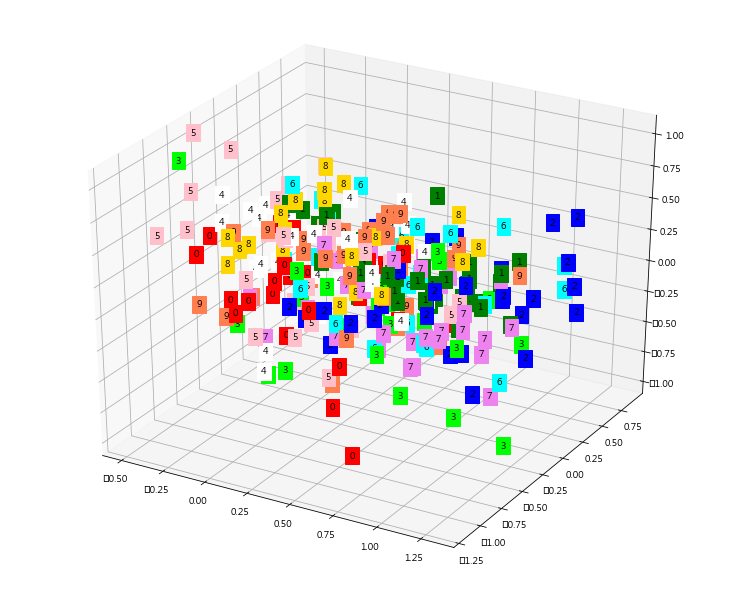

In [57]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 8
fig = plt.figure(1)
ax = Axes3D(fig)
xs = _bottleneck[:, 0]
ys = _bottleneck[:, 1]
zs = _bottleneck[:, 2]
color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']
for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())
plt.show()

### Keras를 이용한 AutoEncoder

In [58]:
# 정확도 plotting
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)
    
# 손실율 plotting
def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    if title is not None:
        plt.title(title)
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)
    
# 위의 두 함수를 한번에 호출
def plot_loss_acc(history):
    plot_loss(history, "손실 추이")
    plt.show()
    plot_acc(history, "정확도 추이")
    plt.show()

In [59]:
class AE(keras.models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes, )
        
        # 입력 계층
        x = keras.layers.Input(shape=x_shape)
        
        # 은닉 계층
        z = keras.layers.Dense(z_dim, activation="relu")(x)
        
        # 출력 계층
        y = keras.layers.Dense(x_nodes, activation="sigmoid")(z)
        
        super().__init__(x, y)
        self.x = x
        self.z = z
        self.z_dim = z_dim
        
        self.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    
    def Encoder(self):
        return keras.models.Model(self.x, self.z)
    
    def Decoder(self):
        z_shape = (self.z_dim, )
        z = keras.layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return keras.models.Model(z, y)

In [60]:
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()  #> 비지도 학습이기 때문에 label 없다

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [61]:
# 차원 변경
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
print(X_train.shape)
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_test.shape)

(60000, 784)
(10000, 784)


In [62]:
# 파라미터 준비
x_nodes = 784
z_dim = 36

autoencoder = AE(x_nodes, z_dim)

In [63]:
hist = autoencoder.fit(X_train, X_train, epochs=5, batch_size=256, shuffle=True, validation_data=(X_test, X_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 37us/step - loss: -1275074.8768 - accuracy: 0.3143 - val_loss: -4364483.5368 - val_accuracy: 0.3038
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: -10467455.9808 - accuracy: 0.3074 - val_loss: -18893644.5952 - val_accuracy: 0.3085
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: -29271766.4747 - accuracy: 0.3077 - val_loss: -43139408.3328 - val_accuracy: 0.3172
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: -57287903.7653 - accuracy: 0.3077 - val_loss: -76356115.0464 - val_accuracy: 0.3089
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: -93480703.2875 - accuracy: 0.3075 - val_loss: -117562418.8160 - val_accuracy: 0.3013


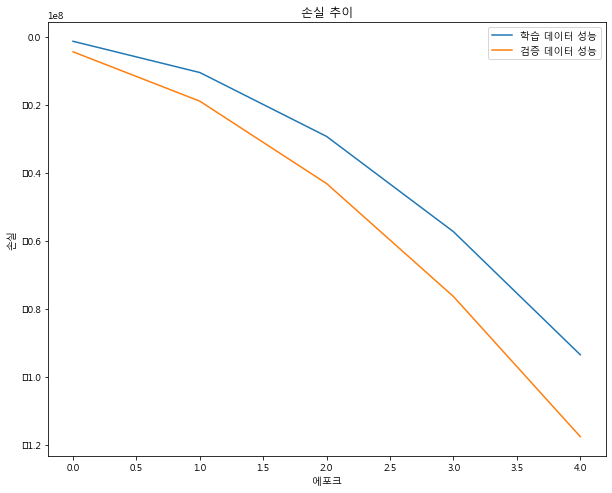

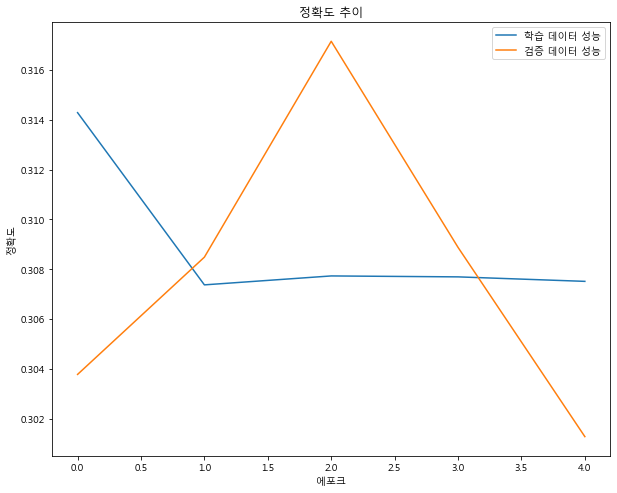

In [64]:
plot_loss_acc(hist)

In [65]:
def show_ae(autoencoder):
    # 부호화, 복호화 모델의 인스턴스 생성
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()
    # 평가용 이미지들을 넣어서 부호화 결과와 복호화 결과 생성
    encoded_imgs = encoder.predict(X_test)
    # 부호화된 이미지를 넣어서 복호화 데이터를 생성함
    decoded_imgs = decoder.predict(encoded_imgs)
    # 화면에 표시할 이미지 수
    n = 10
    # subplot 방식을 사용하여 10개를 하나의 그래프로 그리기 위해 그림의 전체 크기를 20, 6으로 설정
    plt.figure(figsize=(20, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i+1)
        # 입력 이미지(평가용 이미지)
        plt.imshow(X_test[i].reshape(28, 28))
        # 흑백으로 출력
        plt.gray()
        # 이미지 주변 축들이 보이지 않게 함
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(3, n, i+1+n)
        # 이미지가 압축된 형태(2차원 이미지를 1차원의 벡터로 압축)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(3, n, i+1+n+n)
        # 복호화한 이미지 출력
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


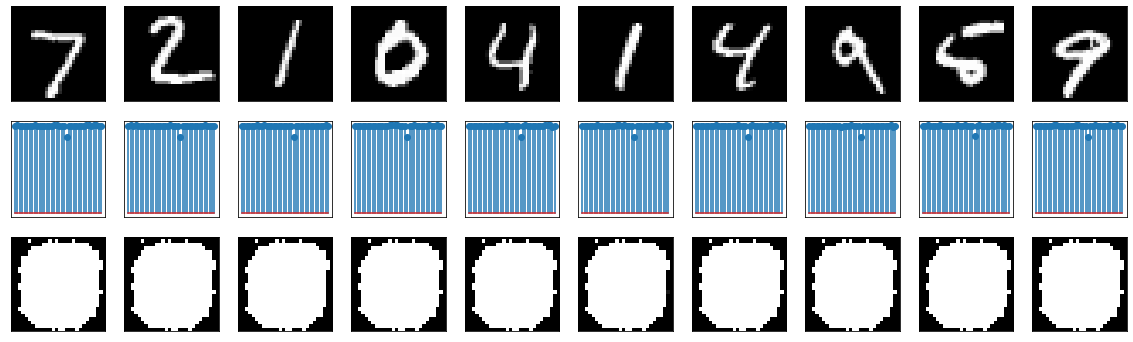

In [66]:
show_ae(autoencoder)